In [33]:
import numpy as np
import matplotlib.pyplot as plt

$$\frac{\partial s}{\partial t} = \frac{Q}{A}\frac{\partial^2 s}{\partial x^2} +k\frac{\partial s}{\partial x} + h[s-1] \mathbb{1}_{[0,B]}$$

In [90]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
h = 0.00000001*k       # From factor 0.00000001 reasonable result!

B = 3000 # m

 ## Steady-state  
   
for $x>B$: $$ 0 = \frac{Q}{A}\frac{\partial^2 s}{\partial x^2} +k\frac{\partial s}{\partial x}$$
such that $$\tilde{s}(x) = \gamma e^{-\frac{Q}{kA}x}$$

for $0<x<B$: $$ 0 = \frac{Q}{A}\frac{\partial^2 s}{\partial x^2} +k\frac{\partial s}{\partial x} + h[s-1]$$
such that $$\tilde{s}(x) = e^{-\frac{Q}{2kA}x} \left ( \alpha \sin(\omega x) + \beta \cos(\omega x) \right )$$
where $\omega = \sqrt{4kh -(Q/A)^2}/2k$.  
  
By posing the 'stitching' requirements $\tilde{s}(B^+) = \tilde{s}(B^-)$ and $\tilde{s}_x(B^+) = \tilde{s}_x(B^-)$ we can solve for $\alpha, \beta, \gamma$.

In [91]:
D = (Q/A)**2-4*k*h
if  D < 0:
    print('Warning: D<0 -> oscillating solution!')
    r = np.sqrt(-D)/(2*k)
    #print(r)
    M = np.array([[0,1,0],[np.exp(-Q/(2*k*A)*B)*np.sin(r*B), np.exp(-Q/(2*k*A)*B)*np.cos(r*B), -np.exp(-Q*B/(k*A))],[np.exp(-Q/(2*k*A)*B)*(r*np.cos(r*B) -Q/(2*k*A)*np.sin(r*B)), np.exp(-Q/(2*k*A)*B)*(-r*np.sin(r*B) -Q/(2*k*A)*np.cos(r*B)), Q/(k*A)*np.exp(-Q*B/(k*A))]])
    coeff = np.linalg.inv(M) @ np.array([2,1,0])
    
else:
    r1 = (-Q/A + np.sqrt((Q/A)**2-4*k*h))/(2*k)
    r2 = (-Q/A - np.sqrt((Q/A)**2-4*k*h))/(2*k)
    
    M = np.array([[1,1,0],[np.exp(r1*B), np.exp(r2*B), -np.exp(-Q*B/(k*A))],[r1*np.exp(r1*B), r2*np.exp(r2*B), Q/(k*A)*np.exp(-Q*B/(k*A))]])
    coeff = np.linalg.inv(M) @ np.array([2,1,0])

def f(x):
    if D<0:
        if x>B: return coeff[2]*np.exp(-Q/(k*A)*x)
        if x<=B: return np.exp(-Q/(2*k*A)*x)*(coeff[0]*np.sin(r*x)+coeff[1]*np.cos(r*x)) -1
    else:
        if x>B: return coeff[2]*np.exp(-Q/(k*A)*x)
        if x<=B: return coeff[0]*np.exp(r1*x) + coeff[1]*np.exp(r2*x) -1

def f0(x):
    if x>B: return np.exp(-Q/(k*A)*(x-B))
    else: return 1
    
def fr(x):
    if x>0: return np.exp(-Q/(k*A)*(x))
    else: return 1

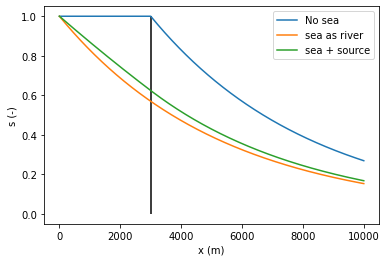

In [92]:
x = np.linspace(0,10e3,1000)
s = [f(x) for x in x]
s0 = [f0(x) for x in x]
sr = [fr(x) for x in x]

plt.figure()
plt.plot(x,s0, label='No sea')
plt.plot(x,sr, label='sea as river')
plt.plot(x,s, label='sea + source')
plt.xlabel('x (m)')
plt.ylabel('s (-)')
plt.vlines(B,0,1, color='black')
plt.legend()
plt.show()

## Non-steady state

Let's consider the non-steady state. We write $$s(x,t) = v(x,t) + \tilde{s}(x)$$.
Then for 0<x<B: $$\frac{\partial v}{\partial t} = a\frac{\partial^2 v}{\partial x^2} +b\frac{\partial v}{\partial x} + cv + P(x)$$
with homogenous boundary conditions.  
  
Now we attempt eigenfunction expansion: $$v(x,t) = \sum_{n=1}^{\infty} T_n^{(1)}(t) \sin(\frac{n\pi x}{L}) + T_n^{(2)}(t) \cos(\frac{n\pi x}{L})$$

from which we arrive at the coupled system
$$ \frac{dT_n^{(1)}}{dt} = [-a (\frac{n \pi}{L})^2 +c] T_n^{(1)} - b \frac{n\pi}{L} T_n^{(2)} + q_n^{(s)}$$
$$ \frac{dT_n^{(2)}}{dt} = [-a (\frac{n \pi}{L})^2 +c] T_n^{(2)} + b \frac{n\pi}{L} T_n^{(1)} + q_n^{(c)}$$.
  
Solving this, yields $$\textbf{T}_n(t) = X(t) \textbf{x}^0 + X(t) I(t)$$

where $$X(t) = e^{\lambda_n t}\begin{bmatrix}
\cos(\mu_n t) & \sin(\mu_n t) \\
\sin(\mu_n t) & -\cos(\mu_n t)
\end{bmatrix}$$

with $\lambda_n = -a(n\pi/L)^2 +c, \mu_n = b n\pi /L$.  
  
$$\textbf{I}(t) = \frac{e^{-\lambda_n t}}{\lambda_n^2 + \mu_n^2}\begin{bmatrix}
e^{\lambda_n t} [-q_n^{(c)}\mu_n + q_n^{(s)} \lambda_n] + \sin(\mu_n t) [q_n^{(s)}\mu_n + q_n^{(c)}\lambda_n] -\cos(\mu_n t)[-q_n^{(c)}\mu_n + q_n^{(s)}\lambda_n ] \\
e^{\lambda_n t} [-q_n^{(s)}\mu_n - q_n^{(c)} \lambda_n] + \sin(\mu_n t) [-q_n^{(c)}\mu_n + q_n^{(s)}\lambda_n] -\cos(\mu_n t)[-q_n^{(s)}\mu_n - q_n^{(c)}\lambda_n ]
\end{bmatrix}$$

and $\textbf{x}^0 = [S_n(v(x,0)), C_n(v(x,0))]^T$

In [ ]:
a = k
b = Q/A
c = h

def s_tilde(x):
    return np.exp(-Q/(k*A)*x)